Aluno: Cauã Brustolin Tardetti

In [8]:

import pandas as pd

dataset = 'default_of_credit_card_clients__courseware_version_1_21_19.xls'
df = pd.read_excel(dataset)

print(df.head())

              ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
0  798fc410-45c1      20000    2          2         1   24     2      2   
1  8a8c8f3b-8eb4     120000    2          2         2   26    -1      2   
2  85698822-43f5      90000    2          2         2   34     0      0   
3  0737c11b-be42      50000    2          2         1   37     0      0   
4  3b7f77cc-dbc0      50000    1          2         1   57    -1      0   

   PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -1     -1  ...          0          0          0         0       689   
1      0      0  ...       3272       3455       3261         0      1000   
2      0      0  ...      14331      14948      15549      1518      1500   
3      0      0  ...      28314      28959      29547      2000      2019   
4     -1      0  ...      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0   

Exercício 1: Criar listas com os nomes das características financeiras

In [9]:
bill_lista = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_lista = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Exercício 2: Examinar as sínteses estatísticas das características de valor da fatura

In [10]:
bill_estatistica = df[bill_lista].describe()
print("Resumo estatístico das características de valor da fatura:")
print(bill_estatistica)

Resumo estatístico das características de valor da fatura:
           BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    50646.744233   48624.349167  4.649736e+04   42791.362167   
std     73376.695080   70893.963498  6.910251e+04   64090.316188   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3234.000000    2682.000000  2.403000e+03    2034.000000   
50%     21644.500000   20597.000000  1.975250e+04   18759.500000   
75%     66148.500000   62999.750000  5.952675e+04   53572.250000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   30000.000000   30000.000000  
mean    39884.398167   38480.350933  
std     60606.644833   59406.836932  
min    -81334.000000 -339603.000000  
25%      1534.000000    1080.000000  
50%     17835.500000   16643.000000  
75%     49804.000000   48863.500000  
max    927171.000000  96

Exercício 3: Visualizar as características de valor da fatura

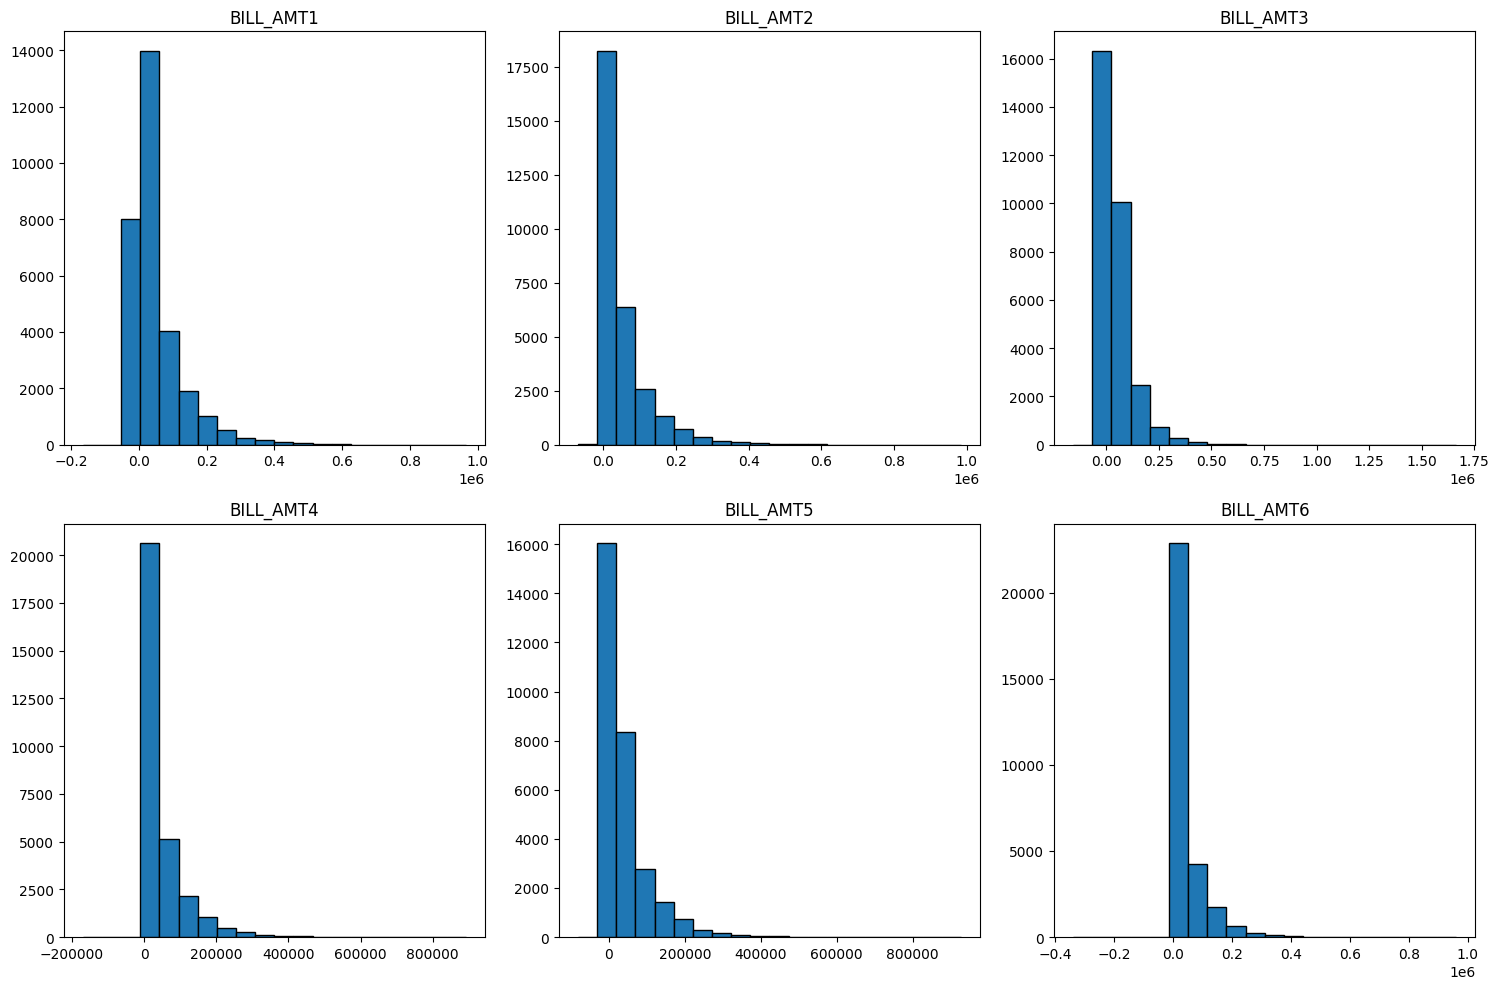

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(bill_lista):
    axes[i].hist(df[col], bins=20, edgecolor='black')
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Exercício 4: Examinar as sínteses estatísticas das características de valor do pagamento

In [12]:
pay_estatitica = df[pay_lista].describe()
print("Resumo estatístico das características de pagamento:")
print(pay_estatitica)

Resumo estatístico das características de pagamento:
            PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.000000   30000.000000   
mean     5613.321500  5.855410e+03    5174.387967    4776.089733   
std     16539.094312  2.299256e+04   17565.538305   15532.893047   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%       836.000000  7.217500e+02     371.000000     223.000000   
50%      2084.500000  2.000000e+03    1776.000000    1500.000000   
75%      5000.000000  5.000000e+03    4500.000000    4000.000000   
max    873552.000000  1.684259e+06  896040.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4754.749200    5164.223267  
std     15239.070708   17712.664703  
min         0.000000       0.000000  
25%       170.750000       9.000000  
50%      1500.000000    1500.000000  
75%      4000.000000    4000.000000  
max    426529.000000  528666.0

Exercício 5: Plotar histogramas das características de pagamento da fatura com rotação no eixo x

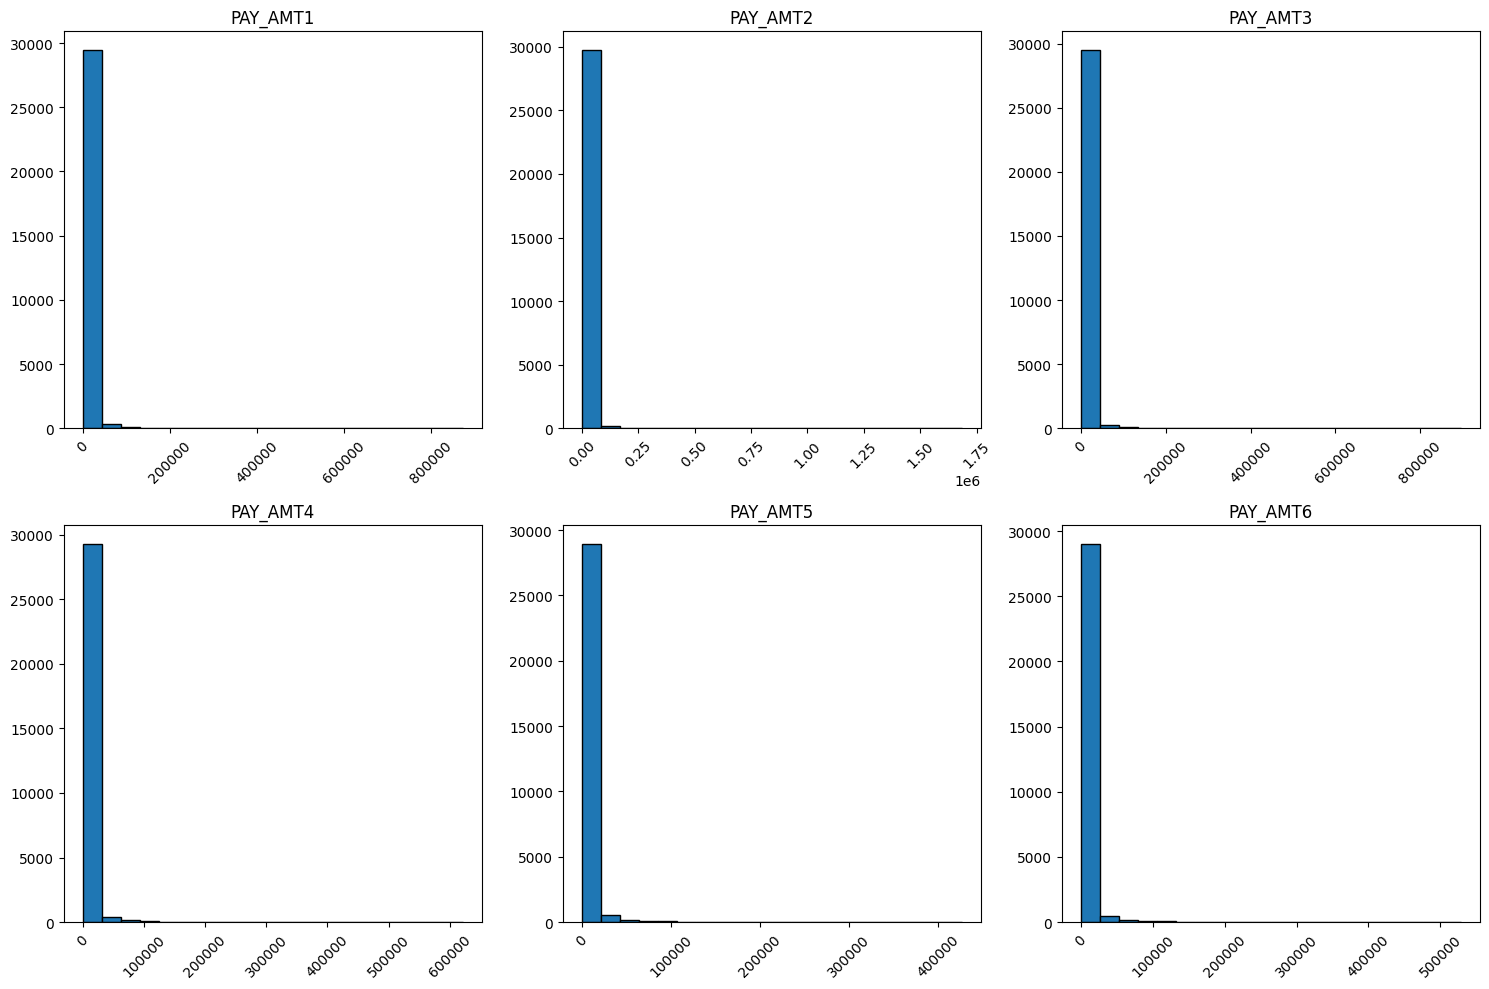

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(pay_lista):
    axes[i].hist(df[col], bins=20, edgecolor='black')
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Exercício 6: Ver quantos valores de pagamento são exatamente 0

In [14]:
zero_payments = (df[pay_lista] == 0).sum()
print("Número de pagamentos iguais a zero por característica:")
print(zero_payments)

Número de pagamentos iguais a zero por característica:
PAY_AMT1    5504
PAY_AMT2    5663
PAY_AMT3    6223
PAY_AMT4    6660
PAY_AMT5    6955
PAY_AMT6    7416
dtype: int64


Exercício 7: Aplicar log10 nos pagamentos diferentes de zero e plotar histogramas

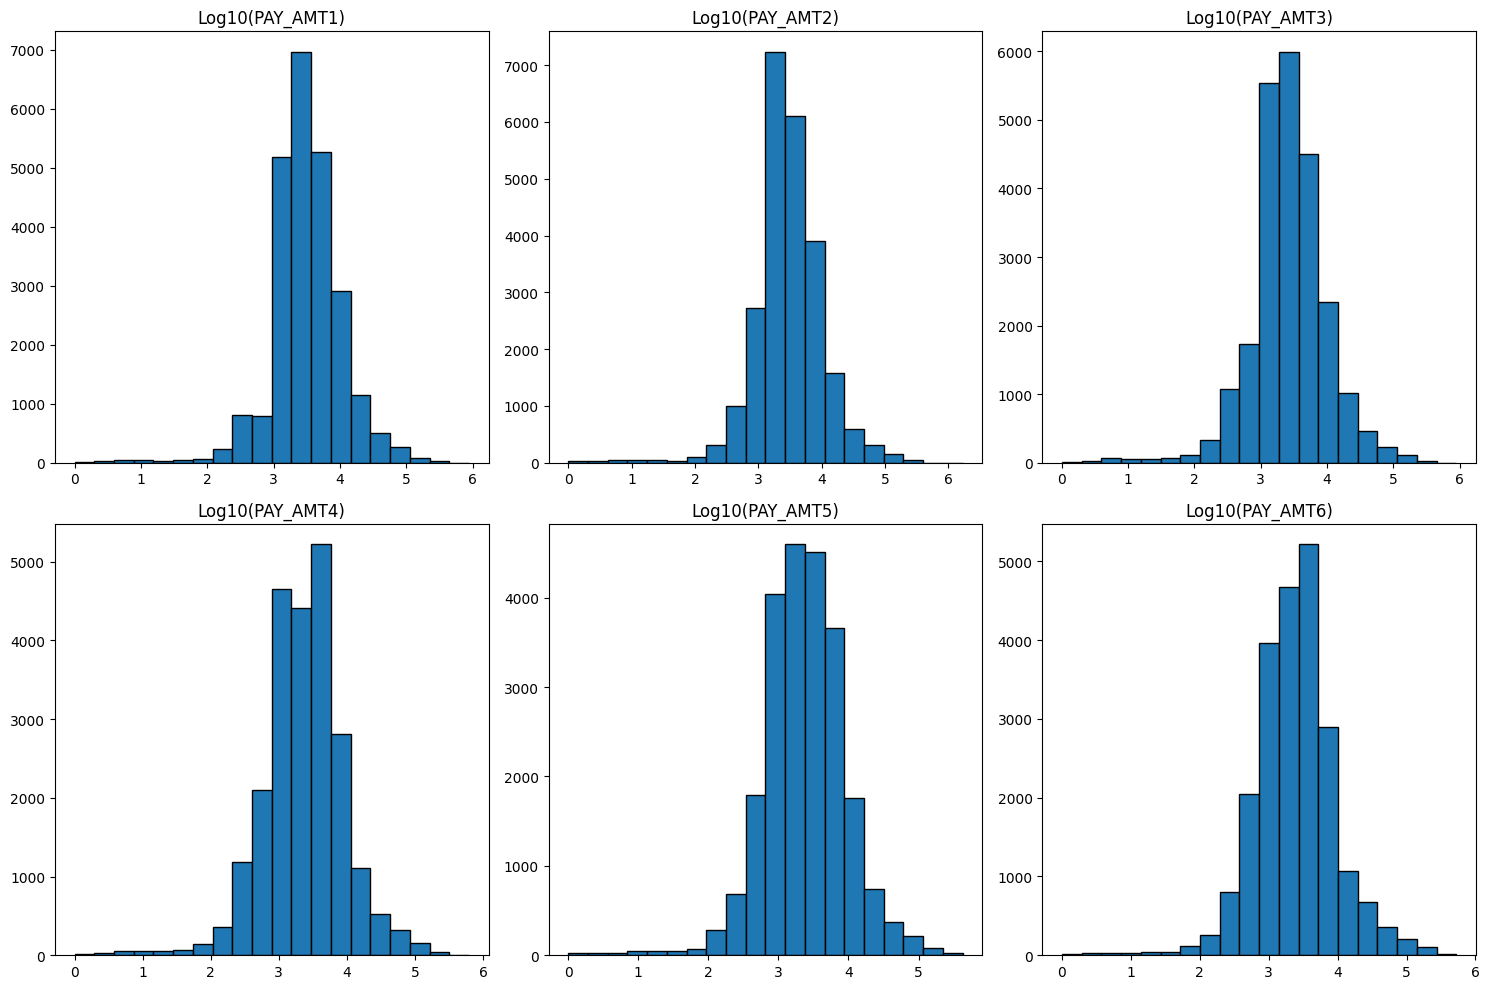

In [15]:
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(pay_lista):
    mask = df[col] > 0  # Criar máscara booleana
    log_values = np.log10(df[col][mask])
    axes[i].hist(log_values, bins=20, edgecolor='black')
    axes[i].set_title(f'Log10({col})')
plt.tight_layout()
plt.show()
